# Best markets to advertise in the e-learning industry

In this project, we would like to find out the 2 best domains (e.g: web and mobile development, data science, game development, etc) in the markets for an e-learning company to advertise. We will use an existing data from a [survey](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/) provided by a popular free-learning platform [freeCodeCamp](https://www.freecodecamp.org/) in 2017. The data is [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',
                    dtype = {'CodeEventOther':str, 'JobInterestOther':str})
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey.shape

(18175, 136)

## How representative is our data set?

Before starting to analyze the sample data we have, we need to clarify whether it's representative to our population of interest and it has the right categories of people for our purpose. We can look into the column **JobRoleInterest** to find the answer.

In [48]:
survey['JobRoleInterest'].str.lower().unique()

array([nan, 'full-stack web developer',
       '  front-end web developer, back-end web developer,   devops / sysadmin,   mobile developer, full-stack web developer',
       ...,
       '  data scientist, game developer,   quality assurance engineer',
       'back-end web developer, data engineer,   data scientist,   devops / sysadmin',
       '  devops / sysadmin,   mobile developer,   product manager, game developer,   front-end web developer, data engineer,   quality assurance engineer,   user experience designer, back-end web developer,   data scientist, full-stack web developer, information security, it specialist '],
      dtype=object)

Since **JobRoleInterest** has multiple options for some responses, we have to split it and count the most frequent answers.

In [49]:
job_role_interest = {}
n_job_interest = {}

# split role by ',' and remove all NA
temp_list = survey['JobRoleInterest'].str.split(',').dropna()

for ans_list in temp_list:
    
    # count the number of role interested
    if len(ans_list) < 5:
        if len(ans_list) not in n_job_interest: 
            n_job_interest[len(ans_list)] = 1
        else: n_job_interest[len(ans_list)] += 1
    else: 
        if '5+' not in n_job_interest: 
            n_job_interest['5+'] = 1
        else: n_job_interest['5+'] += 1
            
    # count the number of role existed in the whole survey
    for ans in ans_list:
        role = ans.strip().lower()  # remove empty space and standardize
        if role in job_role_interest:
            job_role_interest[role] += 1
        else: job_role_interest[role] = 1

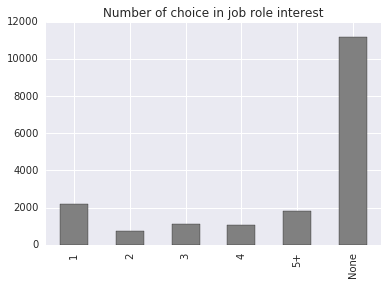

In [50]:
n_role = pd.DataFrame.from_dict(n_job_interest, 
                                orient='index')

# adding the count of missing columns
n_role = n_role.rename(columns={0: 'count'})
n_role.loc['None'] = survey['JobRoleInterest'].isna().sum() 

# barplot
n_role.plot.bar(legend=False, color='grey')
plt.title('Number of choice in job role interest')


Most of the new coders have no answer about the job role interest. It indicates that their purposes are unknown. For the rest, more than half have multiple interests. Therefore, we will drop the data without an obvious purpose.

In [51]:
# target group
target = survey.dropna(subset = ['JobRoleInterest']).copy()

print('We have', target.shape[0], 'rows left.')

We have 6992 rows left.


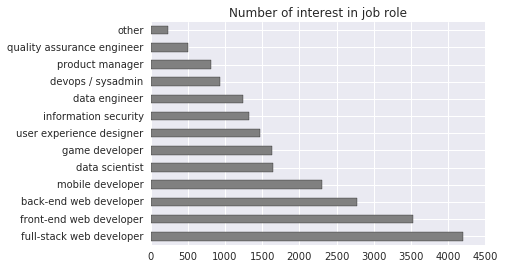

In [52]:
# convert dictionary to dataframe
role_interest = pd.DataFrame.from_dict(job_role_interest, 
                                       orient='index')
role_interest = role_interest.rename(
    columns={0: 'count'}
    ).sort_values(by='count', 
                  ascending = False)

# summarise all options other than top 12
role_interest.loc['other'] = role_interest[12:].sum()
role_interest = pd.concat([role_interest[:12], role_interest[-1:]], axis=0)

# barplot
role_interest.plot.barh(legend=False, color='grey')
plt.title('Number of interest in job role')

*Web developer* and *mobile developer* are the top choices. Since most of the courses the company offered are web and mobile development, this data sample would be representative to our population of interest.

## Respondants demographies

In order to answer our questions, we need the below information from the new coders:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

We can get the answer to the first question in **CountryCitizen**. Let see where most of the respondents locate.

In [53]:
pd.concat([survey['CountryLive'].value_counts(),
          survey['CountryLive'].value_counts(normalize = True)], 
          axis = 1).head(10)

,CountryLive,CountryLive
United States of America,5791,0.377608
India,1400,0.091288
United Kingdom,757,0.049361
Canada,616,0.040167
Brazil,364,0.023735
Germany,324,0.021127
Poland,265,0.017280
Russia,263,0.017149
Australia,259,0.016888
France,228,0.014867


Most of the respondents locate in **United States of America** and **India**, and followed by **United Kingdom** and **Canada**.

In [10]:
print('The minimum month of learning is',target['MonthsProgramming'].min())

The minimum month of learning is 0.0


Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [11]:
print('There are',target['MonthsProgramming'].isna().sum(),'NA values in MonthsProgramming.')

There are 359 NA values in MonthsProgramming.


In [12]:
# replace 0 months with 1
target.loc[target['MonthsProgramming'] == 0.0, 'MonthsProgramming'] = 1

# replace NA with 1
target['MonthsProgramming'].fillna(1, inplace=True)

In [13]:
print('There are',target['MoneyForLearning'].isna().sum(),'NA values in MoneyForLearning.')

There are 516 NA values in MoneyForLearning.


We assume the missing values in **MoneyForLearning** as 0.

In [14]:
# replace NA with 0
target['MoneyForLearning'].fillna(0, inplace=True)

In [54]:
# New column for the amount of money a student has spent per month (at the moment they completed the survey).
target['SpentPerMonth'] = target['MoneyForLearning']/target['MonthsProgramming']

print('There are',(target['SpentPerMonth']==0).sum(),'respondants spent nothing on learning programming.')

There are 2904 respondants spent nothing on learning programming.


In [16]:
print('There are',target['CountryLive'].isna().sum(),'NA values in CountryLive.')

There are 154 NA values in CountryLive.


We remove also any rows that have null values in the CountryLive column since we cannot locate the market they are in.

In [55]:
target.dropna(subset=['CountryLive'], inplace=True)

In [56]:
# average, median and maximum SpentPerMonth in selected countries
target.groupby('CountryLive')['SpentPerMonth'].agg(
    ['mean', 'median', 'max']
).loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

,mean,median,max
CountryLive,,,
United States of America,inf,5.00,inf
India,inf,0.00,inf
United Kingdom,inf,0.25,inf
Canada,inf,0.00,inf


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7fdb4dc93940>,
 <a list of 4 Text xticklabel objects>)

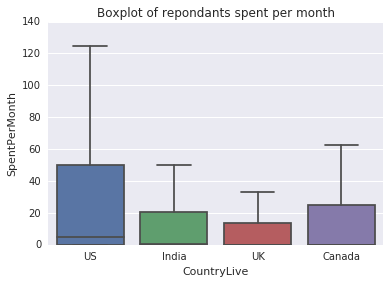

In [57]:
# filter target countries
df = target[target['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]                                            

# boxplot
ax = sns.boxplot(
    x="CountryLive", y="SpentPerMonth", data=df, 
    showfliers = False # exclude outliners
)
plt.title('Boxplot of repondants spent per month')
plt.xticks(np.arange(4), ['US', 'India', 'UK', 'Canada'])

US has not only the greatest market, their respondents are also the most willing to spend on learning compared to India, UK and Canada in average. Meanwhile, US is the only country with more than half of respondents who are willing to pay. Respondents in UK spent the least, only as much as 1/3 from India.

Therefore, it is no doubt that US should be the first market to advertise in. Considering that the subscription fee is $59 per month, India and Canada can both be the target markets since their average spending is higher than the subscription fee. Last but not least, the number of valid respondents in India is more than double of Canada. For this reason, India would be a better choice for the second market even though Canada has the second-highest average spending and a larger range than India.

## Allocation of advertising budget

We can use the expected return from the markets to decide the proportion of the advertising budget. The expected return is equal to the number of respondents who are willing to pay the subscription fee, $59.

In [42]:
# filter respondants in the target countries willing to pay the subscription fee
adv_countries = df[df['CountryLive'].isin(['United States of America', 'India'])].copy()
adv_group = adv_countries[adv_countries['MoneyForLearning'] >= 59].copy()
adv_group['CountryLive'].value_counts(normalize = True)

United States of America    0.893099
India                       0.106901
Name: CountryLive, dtype: float64

In conclusion, 90% of the budget should be invested in the US market and 10% in the Indian market. 